<a href="https://colab.research.google.com/github/keithferns98/TimeSeriesAnalysis/blob/main/TimeSeries_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import chart_studio.plotly as py
import plotly.express as px
from datetime import datetime

In [2]:
!pip install chart_studio

     |████████████████████████████████| 64 kB 1.9 MB/s 


In [4]:
pd.date_range('2020-10-01',periods=15,freq='D')

DatetimeIndex(['2020-10-01', '2020-10-02', '2020-10-03', '2020-10-04',
               '2020-10-05', '2020-10-06', '2020-10-07', '2020-10-08',
               '2020-10-09', '2020-10-10', '2020-10-11', '2020-10-12',
               '2020-10-13', '2020-10-14', '2020-10-15'],
              dtype='datetime64[ns]', freq='D')

In [5]:
pd.to_datetime(['10/01/2020', '10/02/2020'],format='%d/%m/%Y')

DatetimeIndex(['2020-01-10', '2020-02-10'], dtype='datetime64[ns]', freq=None)

In [7]:
arr_i =np.random.randint(10,50,size=(3,3))
date_arr=pd.date_range('2020-01-01',periods=3,freq='D')
df=pd.DataFrame(arr_i,columns=['A','B','C'],index=date_arr)


In [11]:
df.head()
df.index.max()

Timestamp('2020-01-03 00:00:00', freq='D')

In [12]:
  df_appl=pd.read_csv('appl.csv')
  df_appl.head()

,AAPL_x,AAPL_y
0,2014-01-02,77.445395
1,2014-01-03,77.045575
2,2014-01-06,74.896972
3,2014-01-07,75.856461
4,2014-01-08,75.091947


In [14]:
px.line(df_appl,x='AAPL_x',y='AAPL_y',labels={'x':'Date','y':'Price'})

In [16]:
df_appl=pd.read_csv('appl.csv',index_col='AAPL_x',parse_dates=True)
arr_2=np.random.randint(86000000,256000000,size=240)
df_appl['Volume']=arr_2
df_appl.rename(columns={'AAPL_y':'Price'},inplace=True)
df_appl

,Price,Volume
AAPL_x,,
2014-01-02,77.445395,109316039
2014-01-03,77.045575,186813077
2014-01-06,74.896972,132294297
2014-01-07,75.856461,143359033
2014-01-08,75.091947,203956966
...,...,...
2014-12-08,113.653345,142323227
2014-12-09,109.755497,236082474
2014-12-10,113.960331,229833458


In [18]:
df_appl.resample(rule='A').mean()



,Price,Volume
AAPL_x,,
2014-12-31,90.102612,1.816909e+08


In [20]:
df_appl['Price'].resample('A').std()

AAPL_x
2014-12-31    13.315813
Freq: A-DEC, Name: Price, dtype: float64

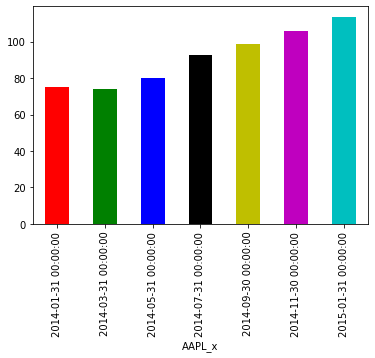

In [21]:
# Bimonthly plus a bar plot with a list of colors
df_appl['Price'].resample(rule='2M').mean().plot.bar(color=list('rgbkymc'))

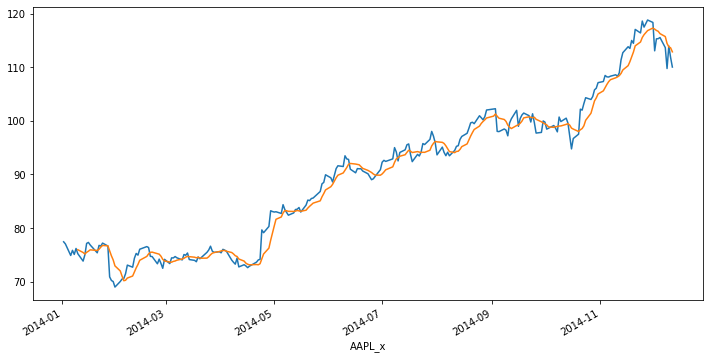

In [25]:
df_appl['Price'].plot(figsize=(12,6))
df_appl.rolling(window=7).mean()['Price'].plot()

In [27]:
df_appl.shift(1)

,Price,Volume
AAPL_x,,
2014-01-02,NaN,NaN
2014-01-03,77.445395,109316039.0
2014-01-06,77.045575,186813077.0
2014-01-07,74.896972,132294297.0
2014-01-08,75.856461,143359033.0
...,...,...
2014-12-08,115.536126,211674628.0
2014-12-09,113.653345,142323227.0
2014-12-10,109.755497,236082474.0
